# Finding optimal hyper parameters for a CNN model

The point of this notebook is to obtain an optimal set of parameters for our CNN model to process time based series data. Specifically, we are processing IoT data from TON a well-kept dataset from The UNSW Group in Canberra, Australia.

The specific dataset being discussed here is the IoT Modbus dataset.



We have pip install mealpy each time because it is not a default python package ,and every time the runtime refreshes; the package is uninstalled.

In [ ]:
%pip install mealpy==3.0.1
%pip install -U scikit-learn
%pip install imbalanced-learn
%pip install matplotlib
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Our main libraries used are:

*   Imblearn
*   Pandas
*   Matplot Lib
*   MealPy
*   Numpy
*   SKLearn
*   Tensorflow
*   Time



In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from imblearn.combine import SMOTETomek
import numpy
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from mealpy import FloatVar, SOA
import time

# Preparing the Datasets for the CNN Model

We split off the information that indicates whether or not an attack has occured (*label*) and the types of attacks (*type*).
Now there are three dataframes:
  X - all features
  y - attack or not
  y_type - type of attack

We split again into test and train data sets and include some randomness.
**Reset_index** drops the indexes from these new dataframes.
Next, we encode the text data, add another randomness, and scale all dataframes. The X dataframe is reshaped.

In [ ]:
#Uncomment for local use
#raw_data = pandas.read_csv('../../Train_Test_IoT_dataset/Train_Test_IoT_Modbus.csv')
#Uncomment for Google Colab
raw_data = pandas.read_csv('Train_Test_IoT_Modbus.csv')
X = raw_data.drop(columns=['label','type'])
y = raw_data['label']
y_type = raw_data['type']

In [ ]:
# Binary
X_train, X_testsplit, y_train, y_testsplit = train_test_split(X, y, test_size=0.2, random_state=777)
# Binary validation
X_test, X_validation, y_test, y_validation = train_test_split(X_testsplit, y_testsplit, test_size=0.5, random_state=777)

#drop index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validation = X_validation.reset_index(drop=True)
y_validation = y_validation.reset_index(drop=True)

In [ ]:
encoder = OrdinalEncoder()
label_encoder = LabelEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_test_encode = encoder.fit_transform(X_test)
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.fit_transform(y_test)
X_validation_encode = encoder.fit_transform(X_validation)
y_validation_encode = label_encoder.fit_transform(y_validation)

In [ ]:
smotetomek = SMOTETomek(random_state=777)
X_rebalance, y_rebalance = smotetomek.fit_resample(X_train_encode, y_train_encode)

c:\Users\George\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\George\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\George\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [ ]:
scaler = StandardScaler()
X_rebalance = scaler.fit_transform(X_rebalance)
X_test_encode = scaler.transform(X_test_encode)

X_validation_encode = scaler.transform(X_validation_encode)

In [ ]:
X_rebalance = X_rebalance.reshape(X_rebalance.shape[0], X_rebalance.shape[1], 1)
X_test_encode = X_test_encode.reshape(X_test_encode.shape[0], X_test_encode.shape[1], 1)

X_validation_encode = X_validation_encode.reshape(X_validation_encode.shape[0], X_validation_encode.shape[1], 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 50)          │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2, 50)          │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,633 (248.57 KB)

 Trainable params: 63,533 (248.18 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5070 - loss: 0.6936 - val_accuracy: 0.8647 - val_loss: 0.6909
Epoch 2/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5079 - loss: 0.6931 - val_accuracy: 0.6860 - val_loss: 0.6907
Epoch 3/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5135 - loss: 0.6929 - val_accuracy: 0.8190 - val_loss: 0.6905
Epoch 4/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5227 - loss: 0.6916 - val_accuracy: 0.8425 - val_loss: 0.6904
Epoch 5/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5175 - loss: 0.6929 - val_accuracy: 0.7165 - val_loss: 0.6902
Epoch 6/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5204 - loss: 0.6917 - val_accuracy: 0.7203 - val_loss: 0.6900
Epoch 7/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5181 - loss: 0.6920 - val_accuracy: 0.6831 - val_loss: 0.6898
Epoch 8/70
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5289 - loss: 0.6913 - val_accuracy: 0.

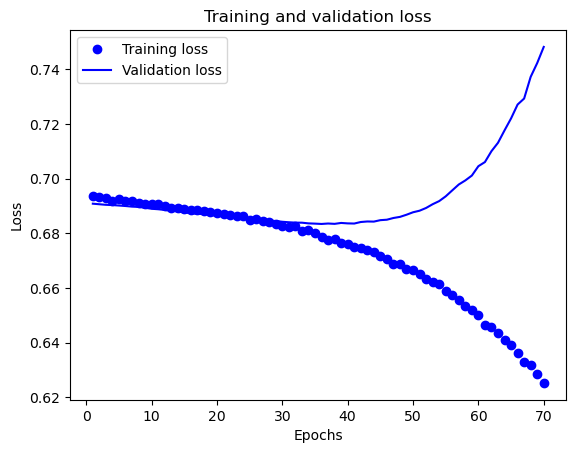

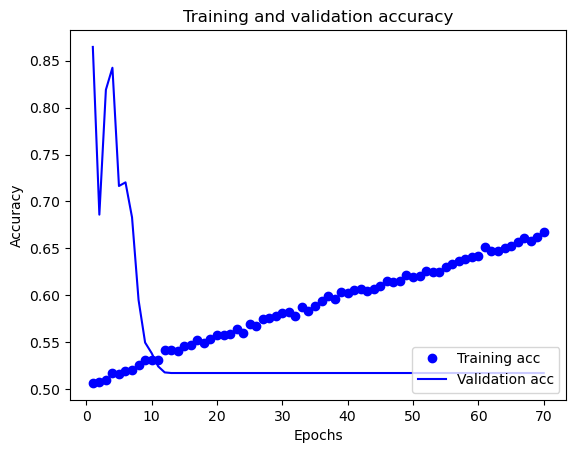


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1491
           1       0.52      1.00      0.68      1620

    accuracy                           0.52      3111
   macro avg       0.26      0.50      0.34      3111
weighted avg       0.27      0.52      0.36      3111


Confusion Matrix
[[   0 1491]
 [   0 1620]]


c:\Users\George\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\George\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\George\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


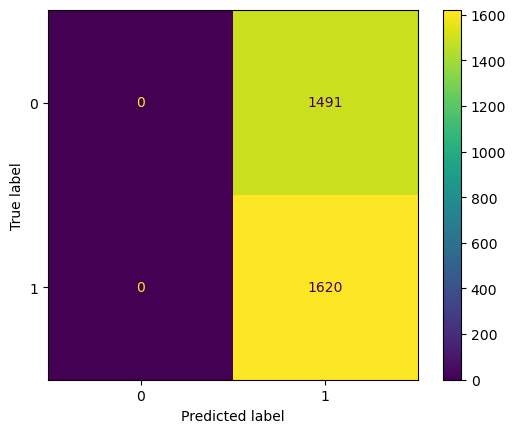

Time taken: 151.9967 seconds


In [ ]:
start_time_1 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=50, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(512, activation='relu'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.001)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=64, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time1 = time.perf_counter()
print(f"Time taken: {end_time1 - start_time_1:0.4f} seconds")

# Optimizing the model
Instead of looking at random number ranges for learning rates, filters, and hidden units, we have encoded specific values.

The hyper parameters we are attempting to optimize are:

*   Batch Size
*   Activation Functions
*   Learning Rates
*   Filters
*   Hidden Units


The base CNN model we made is ingested into *objective_function*.
  This is where our hyper parameters are being considered.
  It returns the Accuracy of that particular iteration.
**LB** and **UB** is set according to the list given above.



2025/04/14 04:56:02 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: Solving single objective optimization problem.


Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.8087431639432907
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.482802927

2025/04/14 05:23:46 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 1, Current best: 0.4828029274940491, Global best: 0.4828029274940491, Runtime: 872.04331 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.3985856771469116


2025/04/14 05:39:43 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 2, Current best: 0.3985856771469116, Global best: 0.3985856771469116, Runtime: 956.65575 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/14 05:55:29 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 3, Current best: 0.4828029274940491, Global best: 0.3985856771469116, Runtime: 946.04549 seconds


Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/14 06:13:45 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 4, Current best: 0.4828029274940491, Global best: 0.3985856771469116, Runtime: 1095.40172 seconds


Accuracy 0.4828029274940491
Accuracy 0.4307296872138977
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5159112811088562
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491


2025/04/14 06:32:15 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 5, Current best: 0.4307296872138977, Global best: 0.3985856771469116, Runtime: 1109.99258 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4921247363090515
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.2526518702507019
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/14 06:50:48 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 6, Current best: 0.2526518702507019, Global best: 0.2526518702507019, Runtime: 1113.04205 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5207328796386719
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/14 07:09:15 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 7, Current best: 0.4828029274940491, Global best: 0.2526518702507019, Runtime: 1107.12775 seconds


Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.3976213335990906
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.1825779676437378
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/14 07:28:02 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 8, Current best: 0.1825779676437378, Global best: 0.1825779676437378, Runtime: 1126.94785 seconds


Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.2420443296432495
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285


2025/04/14 07:46:42 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 9, Current best: 0.2420443296432495, Global best: 0.1825779676437378, Runtime: 1120.04357 seconds


Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285


2025/04/14 08:05:24 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 10, Current best: 0.1764705777168274, Global best: 0.1764705777168274, Runtime: 1121.88619 seconds


Accuracy 0.1764705777168274
Accuracy 0.5171970427036285
Accuracy 0.4728383421897888
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.15846997499465942
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/14 08:24:21 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 11, Current best: 0.15846997499465942, Global best: 0.15846997499465942, Runtime: 1137.19799 seconds


Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.3972998857498169
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491


2025/04/14 08:42:32 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 12, Current best: 0.3972998857498169, Global best: 0.15846997499465942, Runtime: 1091.35950 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.47701704502105713
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491


2025/04/14 09:01:50 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 13, Current best: 0.47701704502105713, Global best: 0.15846997499465942, Runtime: 1158.05457 seconds


Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4821600914001465
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285


2025/04/14 09:21:26 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 14, Current best: 0.4821600914001465, Global best: 0.15846997499465942, Runtime: 1175.65539 seconds


Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.48023146390914917
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4828029274940491
Accuracy 0.5171970427036285
Accuracy 0.4477660059928894
Accuracy 0.4828029274940491
Accuracy 0.1890067458152771
Accuracy 0.4828029274940491
Accuracy 0.4828029274940491


2025/04/14 09:41:16 PM, INFO, mealpy.bio_based.SOA.OriginalSOA: >>>Problem: P, Epoch: 15, Current best: 0.1890067458152771, Global best: 0.15846997499465942, Runtime: 1190.16110 seconds


Accuracy 0.5171970427036285
Solution: [0. 0. 0. 0. 0.], Fitness: 0.15846997499465942
Solution: [0. 0. 0. 0. 0.], Fitness: 0.15846997499465942


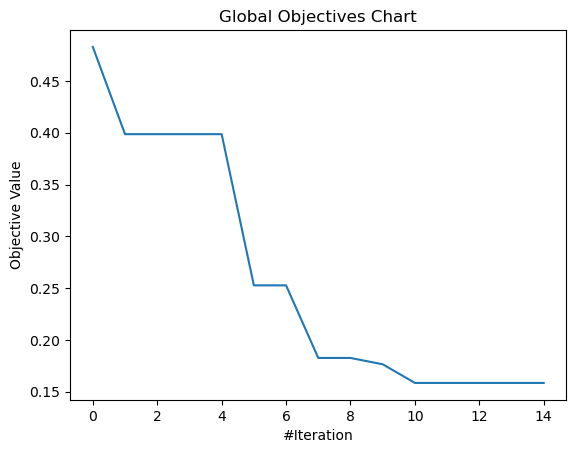

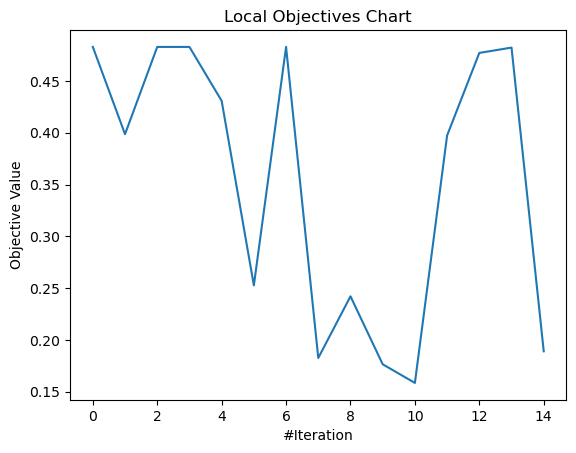

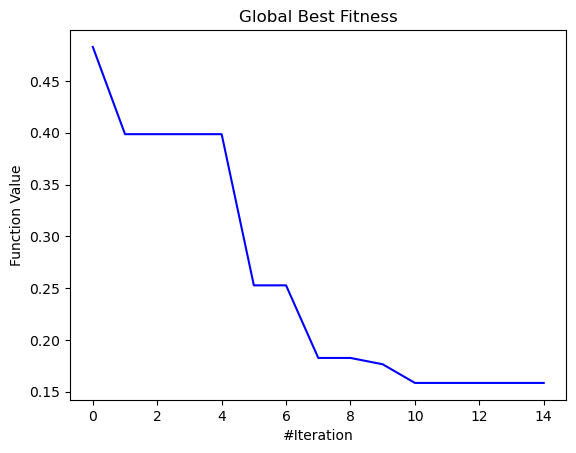

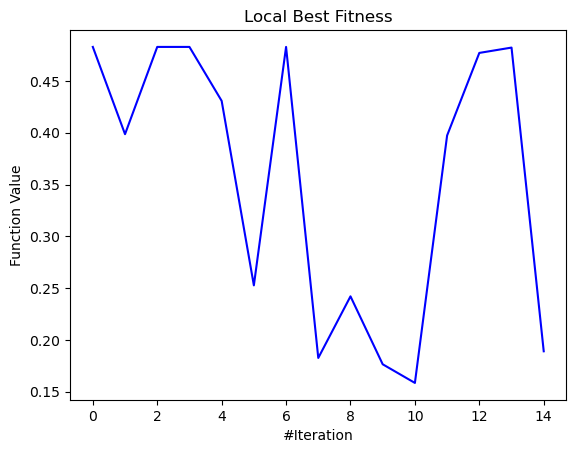

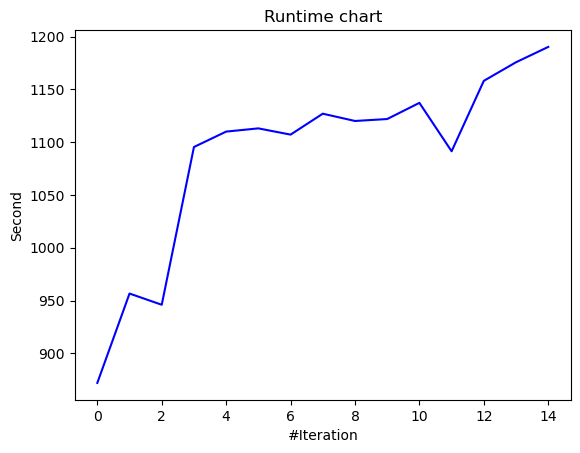

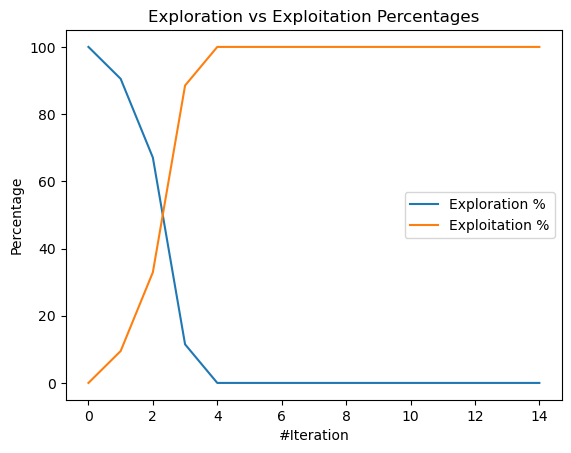

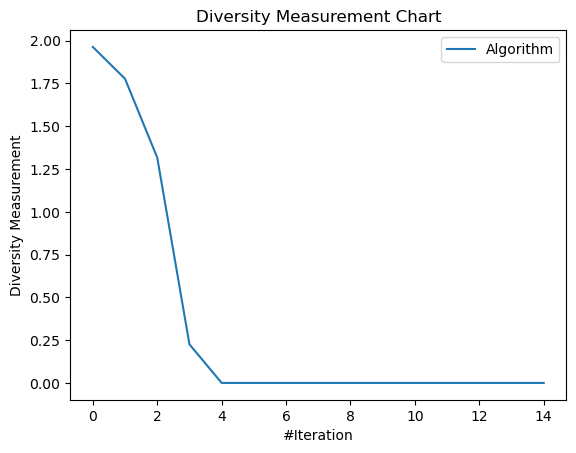

In [ ]:
BATCH_ENCODER = LabelEncoder()
BATCH_ENCODER.fit([32, 64, 128])

#act encoder --> Which activation function should be used?
ACT_ENCODER = LabelEncoder()
ACT_ENCODER.fit(['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'])

#Learning Rate encoder
LR_ENCODER = LabelEncoder()
LR_ENCODER.fit([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1])

#Filter encoder
FILTER_ENCODER = LabelEncoder()
FILTER_ENCODER.fit([25, 50, 75])

#Hidden Units encoder
HIDDEN_ENCODER = LabelEncoder()
HIDDEN_ENCODER.fit([400, 512, 640])

def objective_function(params):
  '''RULES:
      Batch Size - 32, 64, 128
      Activation - softmax, softplus, relu, tanh, sigmoid, hard_sigmoid, linear
      Learning Rate - 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1
      Filters - 25, 50, 75
      Hidden Units - 400, 512, 640
      Dense Layers - 5, 8, 10
  '''
  batch_size = BATCH_ENCODER.inverse_transform([int(params[0])])[0]
  activation = ACT_ENCODER.inverse_transform([int(params[1])])[0]
  learning_rate = LR_ENCODER.inverse_transform([int(params[2])])[0]
  filter = FILTER_ENCODER.inverse_transform([int(params[3])])[0]
  hidden_units = HIDDEN_ENCODER.inverse_transform([int(params[4])])[0]

  model = tensorflow.keras.Sequential()
  model.add(tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1], X_rebalance.shape[2]))),
  model.add(tensorflow.keras.layers.Conv1D(filters=filter, kernel_size=3, activation='sigmoid')),
  model.add(tensorflow.keras.layers.MaxPooling1D(pool_size=2)),
  model.add(tensorflow.keras.layers.Dropout(0.3)),
  model.add(tensorflow.keras.layers.BatchNormalization()),
  model.add(tensorflow.keras.layers.LSTM(64)),
  model.add(tensorflow.keras.layers.Flatten()),
  model.add(tensorflow.keras.layers.Dense(int(hidden_units), activation=activation)),
  model.add(tensorflow.keras.layers.Dropout(0.5)),
  model.add(tensorflow.keras.layers.Dense(1, activation='sigmoid'))


  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(X_rebalance, y_rebalance, batch_size=batch_size, epochs=15, validation_data=(X_validation_encode, y_validation_encode), verbose=0)
  min_validation_accuracy = 1-history.history['val_accuracy'][-1]
  print(f"Accuracy {min_validation_accuracy}")
  return min_validation_accuracy

LB = [0, 0, 0, 0, 0]
UB = [2.99, 6.99, 5.99, 2.99, 2.99]

problem_dict = {
    "obj_func": objective_function,
    "bounds": FloatVar(lb=LB, ub=UB),
    "minmax": "min",
    "verbose": True
}

model = SOA.OriginalSOA(epoch=15, pop_size=20)
g_best = model.solve(problem_dict)
print(f"Solution: {g_best.solution}, Fitness: {g_best.target.fitness}")
print(f"Solution: {model.g_best.solution}, Fitness: {model.g_best.target.fitness}")
model.history.save_global_objectives_chart(filename="SOA-weather/goc")
model.history.save_local_objectives_chart(filename="SOA-weather/loc")

model.history.save_global_best_fitness_chart(filename="SOA-weather/gbfc")
model.history.save_local_best_fitness_chart(filename="SOA-weather/lbfc")

model.history.save_runtime_chart(filename="SOA-weather/rtc")

model.history.save_exploration_exploitation_chart(filename="SOA-weather/eec")

model.history.save_diversity_chart(filename="SOA-weather/dc")


Solution: [0. 0. 0. 0. 0.], Fitness: 0.15846997499465942

Batch Size - **32**, 64, 128

Activation - **softmax**, softplus, relu, tanh, sigmoid, hard_sigmoid, linear

Learning Rate - **0.0005**, 0.001, 0.005, 0.01, 0.05, 0.1

Filters - **25**, 50, 75

Hidden Units - **400**, 512, 640

Model: "sequential_322"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_322 (Conv1D)             │ (None, 4, 25)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_322               │ (None, 2, 25)          │             0 │
│ (MaxPooling1D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_644 (Dropout)           │ (None, 2, 25)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_322         │ (None, 2, 25)          │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_322 (LSTM)                 │ (None, 64)             │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_322 (Flatten)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_644 (Dense)               │ (None, 400)            │        26,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_645 (Dropout)           │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_645 (Dense)               │ (None, 1)              │           401 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,641 (193.91 KB)

 Trainable params: 49,591 (193.71 KB)

 Non-trainable params: 50 (200.00 B)

Epoch 1/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4972 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 2/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4974 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 3/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 4/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 5/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 6/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4999 - loss: 0.6931 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 7/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.5172 - val_loss: 0.6931
Epoch 8/70
805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.

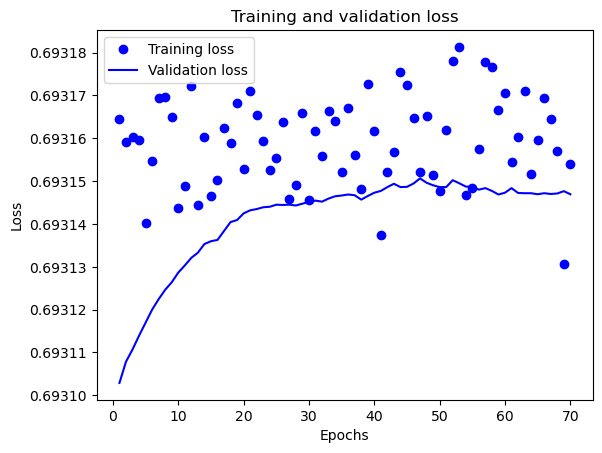

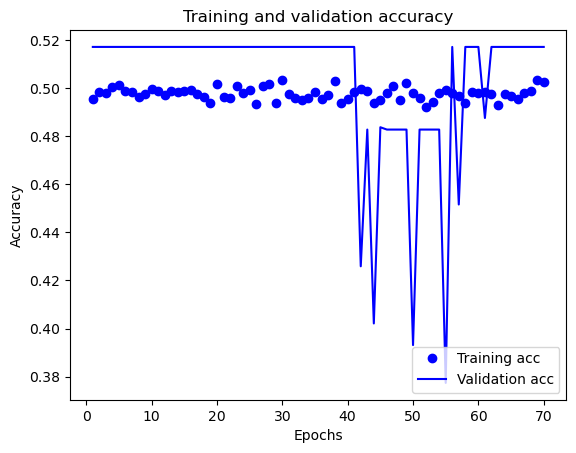


Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1491
           1       0.52      1.00      0.68      1620

    accuracy                           0.52      3111
   macro avg       0.26      0.50      0.34      3111
weighted avg       0.27      0.52      0.36      3111


Confusion Matrix
[[   0 1491]
 [   0 1620]]


c:\Users\George\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\George\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\George\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


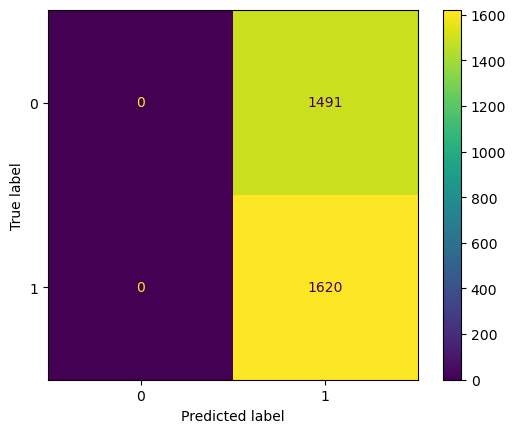

Time taken: 307.5112 seconds


In [ ]:
start_time_2 = time.perf_counter()
with tensorflow.device('/device:GPU:0'):
  # CNN model detection
  # https://keras.io/api/layers/activations/#softmax-function
  detection_model = tensorflow.keras.Sequential([
      tensorflow.keras.layers.Input(shape=(X_rebalance.shape[1],X_rebalance.shape[2])),
      tensorflow.keras.layers.Conv1D(filters=25, kernel_size=3, activation='sigmoid'),
      tensorflow.keras.layers.MaxPooling1D(pool_size=2),
      tensorflow.keras.layers.Dropout(0.3),
      tensorflow.keras.layers.BatchNormalization(),
      tensorflow.keras.layers.LSTM(64),
      tensorflow.keras.layers.Flatten(),
      # 1 layer
      tensorflow.keras.layers.Dense(400, activation='softmax'),
      tensorflow.keras.layers.Dropout(0.5),
      # either attack or normal
      tensorflow.keras.layers.Dense(1, activation='sigmoid')
  ])

  detection_model.summary()
  # https://keras.io/api/losses/probabilistic_losses/#probabilistic-losses
  sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0005)
  detection_model.compile(optimizer=sgd,
                loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

  history = detection_model.fit(X_rebalance, y_rebalance, batch_size=32, epochs=70, validation_data=(X_validation_encode, y_validation_encode))
  test_loss, test_acc = detection_model.evaluate(X_test_encode, y_test_encode)

  # Make predictions
  prediction = detection_model.predict(X_test_encode)
  print(prediction)
  attack_prediction = numpy.where(prediction > 0.5, 1, 0)
  print(attack_prediction)
  print(y_test)

  # Evaluate the model
  print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}\n")
  # https://www.tensorflow.org/tutorials/keras/text_classification for training and validation loss and accuracy
  history_dict = history.history
  # print(history_dict.keys())
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print("\n")

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

  print("\nClassification Report")
  print(classification_report(y_test, attack_prediction))

  print("\nConfusion Matrix")
  print(confusion_matrix(y_test, attack_prediction))
  ConfusionMatrixDisplay.from_predictions(y_test, attack_prediction)
  plt.show()

end_time2 = time.perf_counter()
print(f"Time taken: {end_time2 - start_time_2:0.4f} seconds")